In [1]:
pip install jsmetrics

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install cmasher

Note: you may need to restart the kernel to use updated packages.


In [9]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter
from cmcrameri import cm
import FuncionesERA5 as fsE5
import jsmetrics

In [10]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel(xlab,fontsize=10)
    plt.ylabel(ylab,fontsize=10)
    plt.title(title,fontsize=11)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=8)

In [11]:
def E5contour_f(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.longitude,data.latitude
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))

    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())

    ax.clabel(cc, cc.levels, inline=True, fontsize=10)

    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

### **<font color="Purple"> Datos de ERA-5 </font>**

##### **<font color="olive"> Viento </font>**

In [12]:
fileu_era5 = 'datasets/u_200_500_daily1979-2019.nc'

In [13]:
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']

In [14]:
lonsuE5 = u_era5.longitude
latsuE5 = u_era5.latitude

In [15]:
#Seleccionar solo 200 hPa 
u200E5 = u_era5.sel(level=200)

In [16]:
u200E5_anual=u200E5.mean(dim='time') 

In [17]:
u200E5_season = u200E5.groupby(u200E5.time.dt.season).mean(dim='time')
uE5_DJF = u200E5_season[0]

##### **<font color="olive"> Temperatura </font>**

In [18]:
filet2m_era5 = 'datasets/t2m_dailyC.nc'

In [19]:
t2m_ds=xr.open_dataset(filet2m_era5)
t2m=t2m_ds['t2m']

In [20]:
#Convertir K a °C
#t2m=t2m-273.15 #tal vez a al raficar cambiarlo, este pesa un wen

In [21]:
# Calcular promedio estacional
t2m_estacion=t2m.groupby(t2m.time.dt.season).mean(dim='time') 
t2m_anual = t2m.groupby(t2m.time.dt.year).mean(dim='time').mean(dim='year')

In [22]:
#seleccionar inviernos
invs_E5 = t2m_estacion[0]

In [23]:
latsE5_t=t2m.latitude
lonsE5_t=t2m.longitude

### **<font color="Purple"> Datos de HadGEM3 </font>**

##### **<font color="olive"> Viento </font>**

In [24]:
u_99= 'datasets/uaday200hpa_99_mx.nc'
u_14='datasets/uaday200hpa_14_mx.nc'

In [25]:
# Abrir archivos y seleccionar variables a usar 
u_ds99=xr.open_dataset(u_99)
ua99=u_ds99['ua']  
u_ds14=xr.open_dataset(u_14)
ua14=u_ds14['ua']

In [26]:
u200HG = xr.concat([ua99, ua14], dim='time')

In [27]:
u_sliced = u200HG.sel(lat=slice(10,40))

In [28]:
u200HG_anual = u200HG.mean(dim='time')

In [29]:
u200HG_season=u200HG.groupby(u200HG.time.dt.season).mean(dim='time') 
uHG_DJF = u200HG_season[0]

In [30]:
latsuHG = u200HG.lat
lonsuHG = u200HG.lon

##### **<font color="olive"> Temperatura </font>**

In [31]:
tas_file = 'datasets/tasday79.nc'

In [32]:
#archivo historical
tas_ds=xr.open_dataset(tas_file)
tas=tas_ds['tas']

In [33]:
latsHG_t=tas.lat
lonsHG_t=tas.lon

In [34]:
# Promedio de temperatura por estación 
#si lo separo no pesa tanto?
tas_estacion=tas.groupby(tas.time.dt.season).mean(dim='time') #tas ya está a partir de 1979
tas_anual = tas.groupby(tas.time.dt.year).mean(dim='time').mean(dim='year')
tas_djf = tas_estacion[0]

In [35]:
tas_inviernos = tas.sel(time=tas['time.month'].isin([12, 1, 2]))

In [36]:
import cmasher

In [37]:
cmashermap=cmasher.savanna_r

----
## **<font color="crimson"> HadGEM3 vs ERA5, temperatura y viento (anual y DJF) </font>**

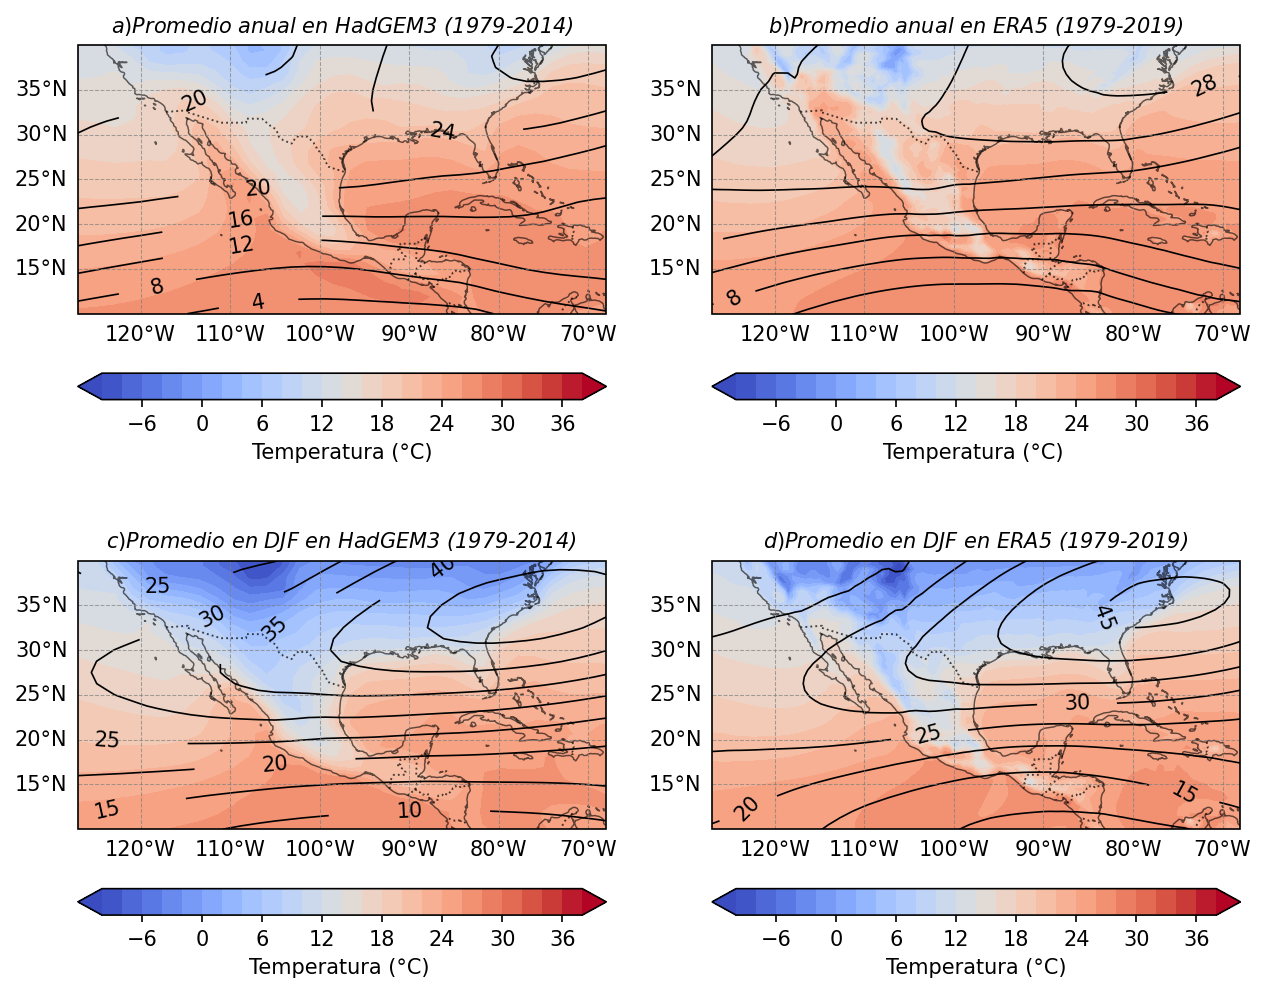

In [44]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# Subplot 1 ANUAL JOYA
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=0.7,alpha=0.6)
cs = ax1.contourf(lonsHG_t, latsHG_t, tas_anual, levels=np.arange(-10, 40,2), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
cc=ax1.contour(lonsuHG, latsuHG, u200HG_anual,levels=np.arange(0,50,4),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10,inline_spacing=0.0001)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
plt.title('a$)$Promedio anual en HadGEM3 (1979-2014)', fontsize=10,fontstyle='italic')

# Subplot 2 ANUAL ERA5
ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines(linewidth=0.7,alpha=0.6)
cs = ax2.contourf(lonsE5_t, latsE5_t, t2m_anual, levels=np.arange(-10, 40, 2),cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
cc=ax2.contour(lonsuE5,latsuE5,u200E5_anual,levels=np.arange(0,50,4),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax2)
cbar.ax.set_xlabel('Temperatura (°C) ', fontsize=10)
plt.title('b$)$Promedio anual en ERA5 (1979-2019)', fontsize=10,fontstyle='italic')

# Subplot 3 DJF JOYA
ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.coastlines(linewidth=0.7,alpha=0.6)
cs = ax3.contourf(lonsHG_t, latsHG_t, tas_djf, levels=np.arange(-10, 40,2), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
cc=ax3.contour(lonsuHG, latsuHG, uHG_DJF,levels=np.arange(0,50,5),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax3.clabel(cc, cc.levels, fontsize=10,inline_spacing=0.0001)
ax3.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax3.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax3)
cbar.ax.set_xlabel('Temperatura (°C) ', fontsize=10)
plt.title('c$)$Promedio en DJF en HadGEM3 (1979-2014) ', fontsize=10,fontstyle='italic')

# Subplot 4 DJF ERA 5
ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.coastlines(linewidth=0.7,alpha=0.6)
cs = ax4.contourf(lonsE5_t, latsE5_t, invs_E5, levels=np.arange(-10, 40, 2), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
cc=ax4.contour(lonsuE5,latsuE5,uE5_DJF,levels=np.arange(0,50,5),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax4.clabel(cc, cc.levels, inline=True, fontsize=10)#,inline_spacing=5)
ax4.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax4.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax4)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
plt.title('d$)$Promedio en DJF en ERA5 (1979-2019) ', fontsize=10,fontstyle='italic')


# Título principal
#plt.tight_layout(h_pad=4)
plt.subplots_adjust(top=.87)
# plt.suptitle('Viento zonal diario a 200 hPa \ny temperatura superficial', fontsize=14, color="k", fontstyle='italic', fontweight='bold')
plt.savefig('figs/2_Viento_zonal_temperatura.png')



In [39]:
# ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax1.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax1.contourf(lonsHG_t, latsHG_t, tas_anual, levels=np.arange(-10, 40,2), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
# cc=ax1.contour(lonsuHG, latsuHG, u200HG_anual,levels=np.arange(0,50,5),colors='k',linewidths=0.8,transform=ccrs.PlateCarree(),zorder=3)
# ax1.clabel(cc, cc.levels, inline=True, fontsize=10,inline_spacing=0.00000000000000000000000000000000000000000000000000001)

# ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
# ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
# gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
# cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
# plt.title('Viento zonal diario a 200 hPa y temperatura superficial \n Promedio anual (1979-2014) \n HadGEM3 ', fontsize=10)

In [40]:
# plt.figure(figsize=(10, 8), dpi=150)
# plt.subplots_adjust(wspace=0.35,hspace=0.35)

# # Subplot 1 ANUAL JOYA
# ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
# ax1.coastlines(linewidth=0.7, alpha=0.6)
# cs1 = ax1.contourf(lonsHG_t, latsHG_t, tas_anual, levels=np.arange(-10, 40, 2), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
# cc1 = ax1.contour(lonsuHG, latsuHG, u200HG_anual, levels=np.arange(0, 50, 3), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
# ax1.clabel(cc1, cc1.levels, inline=True, fontsize=8, inline_spacing=5)
# ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
# ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
# gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# ax1.set_title('Promedio Anual (1979-2014)\nHadGEM3', fontsize=10)

# # Subplot 2 ANUAL ERA5
# ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
# ax2.coastlines(linewidth=0.7, alpha=0.6)
# cs2 = ax2.contourf(lonsE5_t, latsE5_t, t2m_anual - 273.15, levels=np.arange(-10, 40, 2), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
# cc2 = ax2.contour(lonsuE5, latsuE5, u200E5_anual, levels=np.arange(0, 50, 3), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
# ax2.clabel(cc2, cc2.levels, inline=True, fontsize=8, inline_spacing=5)
# ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
# ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
# gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# ax2.set_title('Promedio Anual (1979-2019)\nERA-5', fontsize=10)

# # Subplot 3 DJF JOYA
# ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
# ax3.coastlines(linewidth=0.7, alpha=0.6)
# cs3 = ax3.contourf(lonsHG_t, latsHG_t, tas_djf, levels=np.arange(-10, 40, 2), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
# cc3 = ax3.contour(lonsuHG, latsuHG, uHG_DJF, levels=np.arange(0, 50, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
# ax3.clabel(cc3, cc3.levels, inline=True, fontsize=8, inline_spacing=5)
# ax3.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
# ax3.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
# gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# ax3.set_title('Promedio DJF (1979-2014)\nHadGEM3', fontsize=10)

# # Subplot 4 DJF ERA 5
# ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
# ax4.coastlines(linewidth=0.7, alpha=0.6)
# cs4 = ax4.contourf(lonsE5_t, latsE5_t, invs_E5 - 273.15, levels=np.arange(-10, 40, 2), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
# cc4 = ax4.contour(lonsuE5, latsuE5, uE5_DJF, levels=np.arange(0, 50, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
# ax4.clabel(cc4, cc4.levels, inline=True, fontsize=8, inline_spacing=5)
# ax4.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
# ax4.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
# gl = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# ax4.set_title('Promedio DJF (1979-2019)\nERA-5', fontsize=10)

# # Crear un único colorbar compartido
# cbar = plt.colorbar(cs4, ax=[ax1, ax2, ax3, ax4], orientation='horizontal', fraction=0.01, pad=0.1)
# cbar.ax.set_xlabel('Temperatura (°C)', fontsize=12)

# # Título principal
# plt.subplots_adjust(top=.87)
# plt.suptitle('Viento zonal diario a 200 hPa \n y temperatura superficial', fontsize=14, color="k", fontstyle='italic', fontweight='bold')

# plt.show()
